# Import Packages

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import time, math
from functions import *

In [2]:
np.random.seed(0)

# Define ODEs of the system

In [3]:
def xdot(x, t, sigma=16, r=45.92, b=4):
    """
    x is 3D
    Here, dynamical system describing the lorenz attractor is defined
    **Change this to any other attractor you wish to simulate**
    """
    x0dot = sigma*(x[1]-x[0])
    x1dot = x[0]*(r-x[2])-x[1]
    x2dot = x[0]*x[1]-b*x[2]
    xdot = np.array([x0dot, x1dot, x2dot])
    
    return xdot

# All Parameters

**Simulation parameters- timestep, start and end times**

In [4]:
dt = 0.01 #timestep
tstart = 0
tend = 200 #final time


***Parameters of reconstructed phase space***

In [5]:
tau = 8 # delay
m = 3 # dimension of reconstructed phase space

In [6]:
nsteps_display = 5000 # number of time steps used to display plots of actual and reconstructed phase space

In [7]:
n_orbit = 40 # number of timesteps in one orbital period

**Parameters for computation of lyapunov exponent**

In [8]:
mu = 0 # noise mean 
std = 1 # noise standard deviation

In [9]:
fidloc = 0 #starting location- to avoid transient
tevol = 120 #number of timesteps in fixed evolution time algorithm
dmin = 2.5 # to obtain nearby trajectory and replacement point
anglemax = 2 # max angle allowed, radians

# Numerical Integration using odeint function

In [10]:
t = np.arange(tstart, tend, dt) #the time axis
T = len(t) #number of timepoints


y0 = np.random.rand(3,) #initial point

y_t = odeint(xdot, y0, t) #simulate the dynamical system

In [11]:
y1_t = y_t[:,0] + np.random.normal(mu, std, (y_t.shape[0],)) #observations
yd = reconstructed_phase_space(y1_t, tau, m)

# Figure 1: Separation length in phase space and vs time

index of starting point=100, index of closest point=112
distance to closest point (dmin=1): 0.6398693510168081


Text(0.5, 1.0, '$||\\delta||$ vs t')

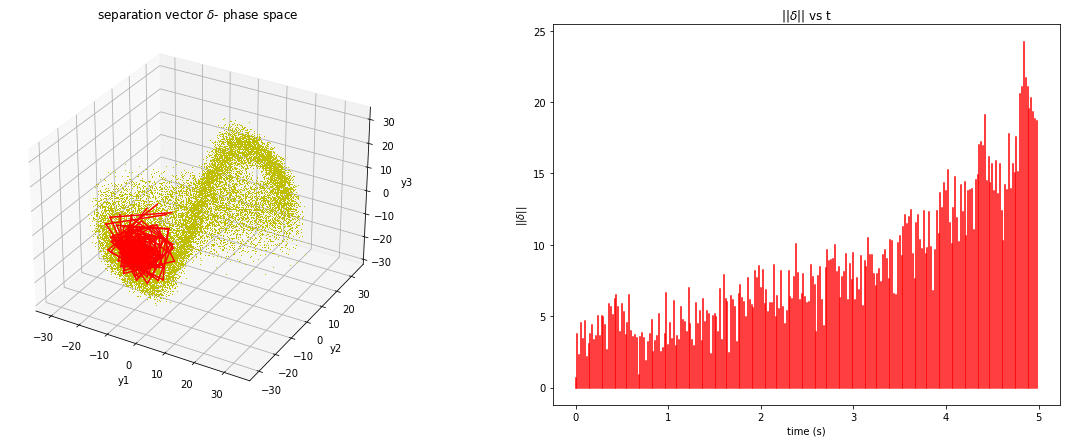

In [12]:
fidloc_visualize = 100 #starting location
numsteps_visualize = 500 #number of time steps
clos = closest_point(fidloc_visualize, yd, dmin=0.5)
print(f"index of starting point={fidloc_visualize}, index of closest point={clos}")
print(f"distance to closest point (dmin=1): {np.linalg.norm(yd[fidloc_visualize,:]-yd[clos,:])}")


fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

clos_pair = np.concatenate((np.expand_dims(yd[fidloc_visualize:fidloc_visualize+numsteps_visualize,:], axis=2), np.expand_dims(yd[clos:clos+numsteps_visualize,:], axis=2)), axis=2)

# ax.scatter(clos_pair[:,0,0], clos_pair[:,1,0], clos_pair[:,2,0], marker='*', color=['r'])
# ax.scatter(clos_pair[:,0,1], clos_pair[:,1,1], clos_pair[:,2,1], marker='*', color=['m'])

# ax.plot(yd[:,0],yd[:,1],yd[:,2], color = "blue")
# ax.set_title("Reconstructed phase space")
# ax.set_xlabel('y1')
# ax.set_ylabel('y2')
# ax.set_zlabel('y3')
# ax.legend(['reconstructed phase space', 'fiducial trajectory', 'nearby trajectory'])

# ax2 = fig.add_subplot(1, 2, 2, projection='3d')
# ax2.scatter(clos_pair[:,0,0], clos_pair[:,1,0], clos_pair[:,2,0], marker='*', color=['r'])
# ax2.scatter(clos_pair[:,0,1], clos_pair[:,1,1], clos_pair[:,2,1], marker='*', color=['m'])
# ax2.set_title("Fiducial & nearby trajectory evolution")
once_every = 2

# ax.plot(yd[:-1:once_every,0],yd[:-1:once_every,1],yd[:-1:once_every,2], 'y,')
ax.plot(yd[:,0],yd[:,1],yd[:,2], "y,")
ax.set_xlabel('y1')
ax.set_ylabel('y2')
ax.set_zlabel('y3')
for i in range(numsteps_visualize//once_every):
    ax.plot(clos_pair[once_every*i, 0, :], clos_pair[once_every*i, 1, :], clos_pair[once_every*i, 2, :], 'r') 
ax.set_title(r"separation vector $\delta$- phase space")
ax2 = fig.add_subplot(1, 2, 2)

for i in range(numsteps_visualize//once_every):
    ax2.plot(np.array([i,i])*once_every*dt,[0,np.linalg.norm(clos_pair[once_every*i,:,0]-clos_pair[once_every*i,:,1], axis=0)], color='r')
ax2.set_xlabel('time (s)')
ax2.set_ylabel(r'$||\delta||$')
ax2.set_title(r"$||\delta||$ vs t")

# Figure 5- Reconstructed phase space for various $\tau$ (delay)

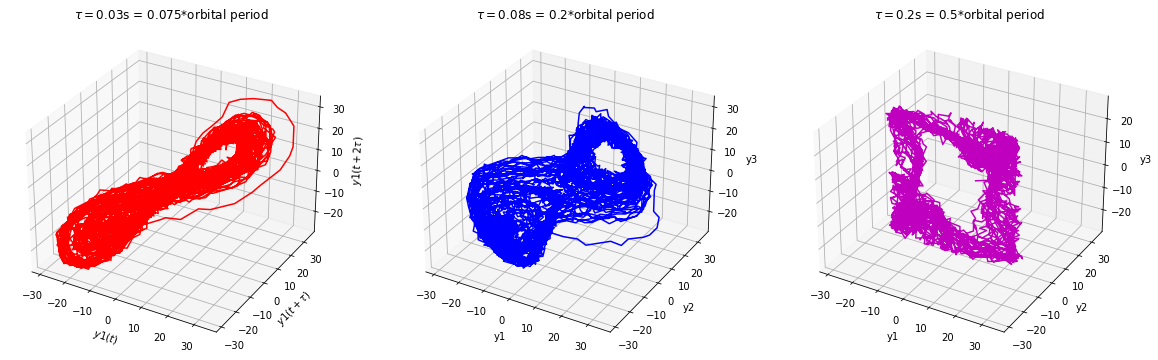

In [13]:
tau = 3
m=3
yd = reconstructed_phase_space(y1_t, tau, m)
fig = plt.figure(figsize = (20, 10))


ax0=fig.add_subplot(1,3,1,projection='3d')
ax0.plot(yd[:nsteps_display,0],yd[:nsteps_display,1],yd[:nsteps_display,2], color = "Red")
ax0.set_xlabel(r'$y1(t)$')
ax0.set_ylabel(r'$y1(t+\tau)$')
ax0.set_zlabel(r'$y1(t+2\tau)$')
ax0.set_title(r"$\tau=$"+str(tau*dt)+'s = '+str(tau/n_orbit) +'*orbital period')

tau = 8
yd = reconstructed_phase_space(y1_t, tau, m)


ax1=fig.add_subplot(1,3,2,projection='3d')
ax1.plot(yd[:nsteps_display,0],yd[:nsteps_display,1],yd[:nsteps_display,2], color = "blue")
ax1.set_title(r"$\tau=$"+str(tau*dt)+'s = '+str(tau/n_orbit) +'*orbital period')
ax1.set_xlabel('y1')
ax1.set_ylabel('y2')
ax1.set_zlabel('y3')

tau = 20
yd = reconstructed_phase_space(y1_t, tau, m)

ax2=fig.add_subplot(1,3,3,projection='3d')
ax2.plot(yd[:nsteps_display,0],yd[:nsteps_display,1],yd[:nsteps_display,2], color = "m")
ax2.set_title(r"$\tau=$"+str(tau*dt)+'s = '+str(tau/n_orbit) +'*orbital period')
ax2.set_xlabel('y1')
ax2.set_ylabel('y2')
ax2.set_zlabel('y3')



plt.show()


# Figure 6 (a): $\lambda$ vs $\tau$

In [14]:
lamAll, local_lam, lengthsAll, lengthsInit, lengthsFinal = compute_lambda(yd, t, fidloc, tevol, dmin, anglemax) #using actual phase space
niter = len(lamAll)
# plt.plot(lamAll)

In [15]:

fidloc = 0 #starting location- to avoid transient
tevol = 120 #number of timesteps in fixed evolution time algorithm
dmin = 2.5 # to obtain nearby trajectory and replacement point


tau_vals = [0.1*n_orbit*(i+1) for i in range(20)]
lam_tau = np.zeros((len(tau_vals),))

tic = time.time()
for j in range(len(tau_vals)):
    tau = int(tau_vals[j])
    yd = reconstructed_phase_space(y1_t, tau, m)
    lamAll, _, _, _, _ = compute_lambda(yd, t, fidloc, tevol, dmin, anglemax) #using actual phase space
    lam = np.mean(lamAll[-20:])
    lam_tau[j] = lam
print(f"Time taken={time.time()-tic}s")

Time taken=30.26826524734497s


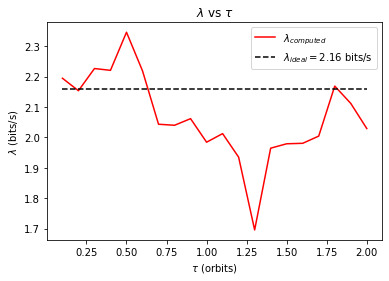

In [16]:
plt.plot(np.array(tau_vals)/n_orbit, lam_tau, 'r')
plt.plot([tau_vals[0]/n_orbit, tau_vals[-1]/n_orbit], [2.16, 2.16], 'k--')
plt.title(r"$\lambda$ vs $\tau$")
plt.xlabel(r'$\tau$ (orbits)')
plt.ylabel(r'$\lambda$ (bits/s)')
plt.legend([r'$\lambda_{computed}$',r'$\lambda_{ideal}=2.16$ bits/s'])

# Figure 6 (b): $\lambda$ vs tevol (evolution time)

In [17]:

fidloc = 0 #starting location- to avoid transient
tau = 8
m = 3
dmin = 2.5 # to obtain nearby trajectory and replacement point


tevol_vals = [0.2*n_orbit*(i+1) for i in range(20)]
lam_tevol = np.zeros((len(tevol_vals),))
yd = reconstructed_phase_space(y1_t, tau, m)
tic = time.time()
for j in range(len(tevol_vals)):
    tevol = int(tevol_vals[j])

    lamAll, _, _, _, _ = compute_lambda(yd, t, fidloc, tevol, dmin, anglemax) #using actual phase space
    lam = np.mean(lamAll[-20:])
    lam_tevol[j] = lam
print(f"Time taken={time.time()-tic}s")

Time taken=69.31507420539856s


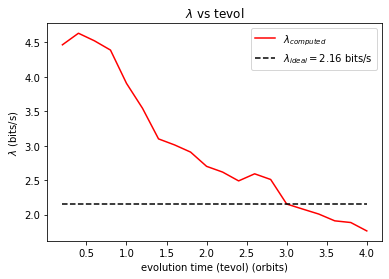

In [18]:
plt.plot(np.array(tevol_vals)/n_orbit, lam_tevol, 'r')
plt.plot([tevol_vals[0]/n_orbit, tevol_vals[-1]/n_orbit], [2.16, 2.16], 'k--')
plt.title(r"$\lambda$ vs tevol")
plt.xlabel(r'evolution time (tevol) (orbits)')
plt.ylabel(r'$\lambda$ (bits/s)')
plt.legend([r'$\lambda_{computed}$',r'$\lambda_{ideal}=2.16$ bits/s'])

# Figure 6 (d) $\lambda$ vs $d_{min}$ (minimum separation length upon replacement)

In [19]:

fidloc = 0 #starting location- to avoid transient
tevol = 120
tau = 8
m = 3

dmin_vals = [0.3*(i) for i in range(20)]
lam_dmin = np.zeros((len(dmin_vals),))
yd = reconstructed_phase_space(y1_t, tau, m)
tic = time.time()
for j in range(len(dmin_vals)):
    dmin = dmin_vals[j]
    lamAll, _, _, _, _ = compute_lambda(yd, t, fidloc, tevol, dmin, anglemax) #using actual phase space
    lam = np.mean(lamAll[-20:])
    lam_dmin[j] = lam
print(f"Time taken={time.time()-tic}s")

Time taken=28.899835109710693s


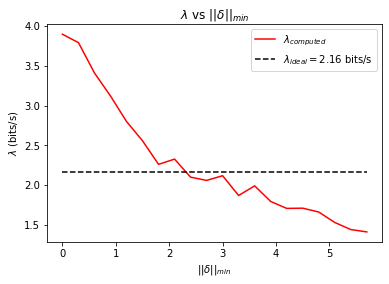

In [20]:
plt.plot(np.array(dmin_vals), lam_dmin, 'r')
plt.plot([dmin_vals[0], dmin_vals[-1]], [2.16, 2.16], 'k--')
plt.title(r"$\lambda$ vs $||\delta||_{min}$")
plt.xlabel(r'$||\delta||_{min}$')
plt.ylabel(r'$\lambda$ (bits/s)')
plt.legend([r'$\lambda_{computed}$',r'$\lambda_{ideal}=2.16$ bits/s'])

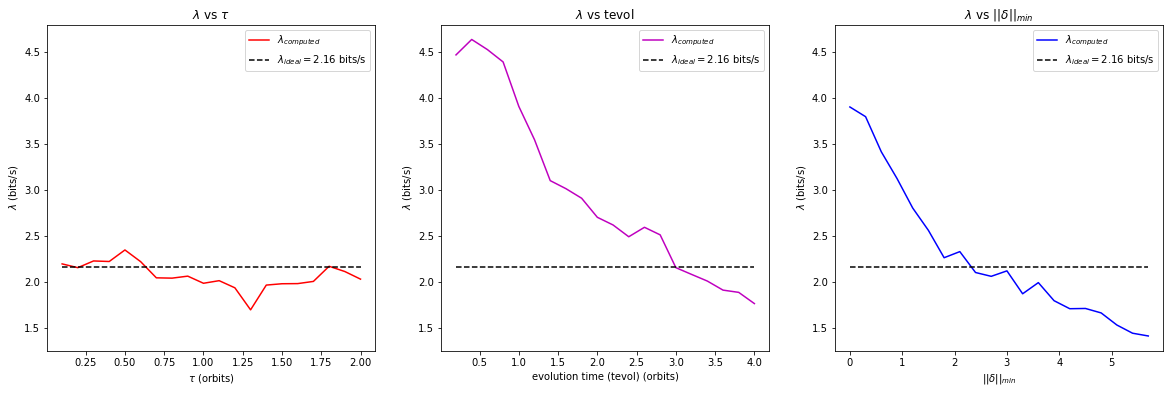

In [21]:
fig = plt.figure(figsize = (20, 6))


ax0=fig.add_subplot(1,3,1)
ax0.plot(np.array(tau_vals)/n_orbit, lam_tau, 'r')
ax0.plot([tau_vals[0]/n_orbit, tau_vals[-1]/n_orbit], [2.16, 2.16], 'k--')
ax0.set_title(r"$\lambda$ vs $\tau$")
ax0.set_xlabel(r'$\tau$ (orbits)')
ax0.set_ylabel(r'$\lambda$ (bits/s)')
ax0.legend([r'$\lambda_{computed}$',r'$\lambda_{ideal}=2.16$ bits/s'])

ax1 = fig.add_subplot(1, 3, 2, sharey=ax0)
ax1.plot(np.array(tevol_vals)/n_orbit, lam_tevol, 'm')
ax1.plot([tevol_vals[0]/n_orbit, tevol_vals[-1]/n_orbit], [2.16, 2.16], 'k--')
ax1.set_title(r"$\lambda$ vs tevol")
ax1.set_xlabel(r'evolution time (tevol) (orbits)')
ax1.set_ylabel(r'$\lambda$ (bits/s)')
ax1.legend([r'$\lambda_{computed}$',r'$\lambda_{ideal}=2.16$ bits/s'])

ax2 = fig.add_subplot(1, 3, 3, sharey=ax0)
ax2.plot(np.array(dmin_vals), lam_dmin, 'b')
ax2.plot([dmin_vals[0], dmin_vals[-1]], [2.16, 2.16], 'k--')
ax2.set_title(r"$\lambda$ vs $||\delta||_{min}$")
ax2.set_xlabel(r'$||\delta||_{min}$')
ax2.set_ylabel(r'$\lambda$ (bits/s)')
ax2.legend([r'$\lambda_{computed}$',r'$\lambda_{ideal}=2.16$ bits/s'])

# Figure 10: $\lambda$ vs t (for different values of T- simulation length)

In [25]:
tau = 8 # delay
m = 3 # dimension of reconstructed phase space
fidloc = 0 #starting location- to avoid transient
tevol = 120 #number of timesteps in fixed evolution time algorithm
dmin = 2.5 # to obtain nearby trajectory and replacement point
tend_all = [20, 50, 100, 200] #corresponds to 500, 2000, 10000, 20000 timepoints
lam_tend = []

tic = time.time()
for i in range(len(tend_all)):
    tend = tend_all[i] #final time
    t = np.arange(tstart, tend, dt) #the time axis
    T = len(t) #number of timepoints
    y0 = np.random.rand(3,) #initial point
    y_t = odeint(xdot, y0, t) #simulate the dynamical system
    y1_t = y_t[:,0] + np.random.normal(mu, std, (y_t.shape[0],)) #observations
    yd = reconstructed_phase_space(y1_t, tau, m)
    lamAll, _, _, _, _ = compute_lambda(yd, t, fidloc, tevol, dmin, anglemax) #using actual phase space
    lam_tend.append(lamAll)
print(f"Time taken={time.time()-tic}s")

Time taken=2.3414721488952637s


Text(0.5, 0.98, '$\\lambda$ vs t (different number of timepoints defining Lorenz attractor)')

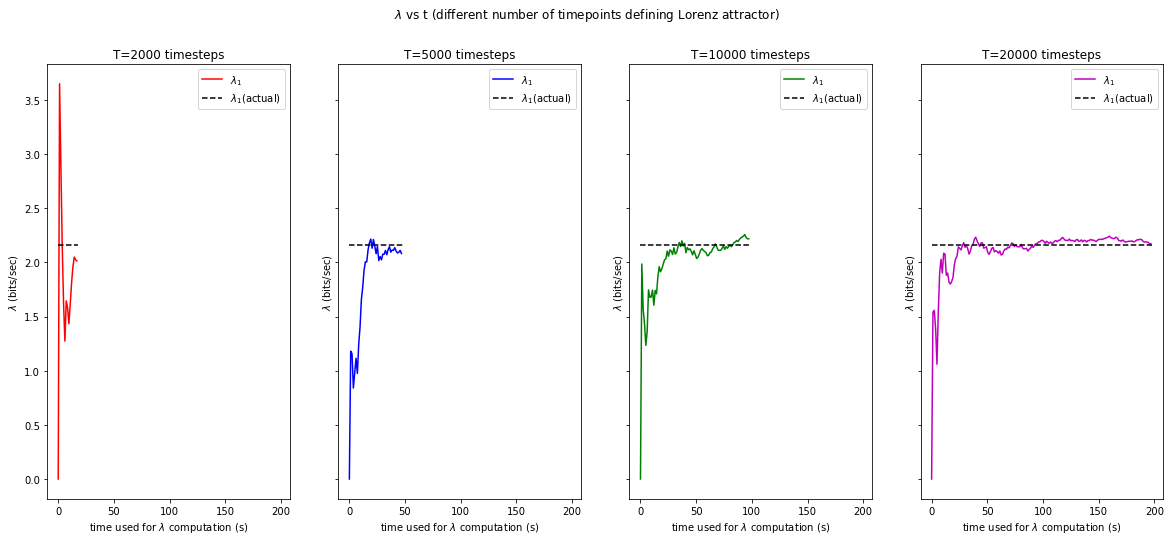

In [26]:
fig, ax = plt.subplots(1, 4, figsize=(20,8), sharey=True, sharex=True)
colors = ['r', 'b', 'g', 'm']
for i in range(len(tend_all)):
    niter = len(lam_tend[i])
    ax[i].plot(t[:niter*tevol:tevol], lam_tend[i], colors[i])
    ax[i].plot([0, t[niter*tevol]], [2.16,2.16], 'k--')
    ax[i].set_xlabel(r'time used for $\lambda$ computation (s)')
    ax[i].set_ylabel(r'$\lambda$ (bits/sec)')
    ax[i].legend([r'$\lambda_1$',r'$\lambda_1$(actual)'])
    ax[i].set_title(r'T='+str(int(tend_all[i]/dt))+' timesteps')
fig.suptitle(r"$\lambda$ vs t (different number of timepoints defining Lorenz attractor)")